<a href="https://colab.research.google.com/github/bharathssa/Machine-Learning/blob/main/Cardekho%20selling%20price%20prediction_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/kaggle/input/cardekho/car data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
### There is no null value
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
from datetime import date
today = date.today()
current_year = today.year
print(current_year)

2022


In [8]:
df['current_year'] = current_year
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [9]:
df['No. of Years'] = df['current_year'] - df['Year']
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,No. of Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5


In [10]:
# Year and Current year is not required at this stage since we have calculate the no.of year of the car

df.drop(columns = ['Year','current_year'], inplace= True, axis =1 )

df.head(3)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5


Let's Do some EDA

In [11]:
numerical_features = [i for i in df.columns if df.dtypes[i]!='O']
print(numerical_features)

['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'No. of Years']


In [12]:
categorical_features = [i for i in df.columns if df.dtypes[i]=='O']
print (categorical_features)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']


In [13]:
### Extracting Unique features from categorical_features
for i in categorical_features:
  print ('{}:'.format(i) , df[i].unique())


Car_Name: ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Dream Yuga '
 'Bajaj Avenger Street 220' 'H

In [14]:
### Let's see count of Fuel_varient used accross various car model
df['Car_Name'].groupby(df['Fuel_Type']).count().sort_values(ascending=False)

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: Car_Name, dtype: int64

In [15]:
### Let's see count of Transmission used accross various car model

df['Car_Name'].groupby(df['Transmission']).count().sort_values(ascending=False)

Transmission
Manual       261
Automatic     40
Name: Car_Name, dtype: int64

In [16]:
### Let's see count of Seller_type used accross various car model

df['Car_Name'].groupby(df['Seller_Type']).count().sort_values(ascending=False)

Seller_Type
Dealer        195
Individual    106
Name: Car_Name, dtype: int64

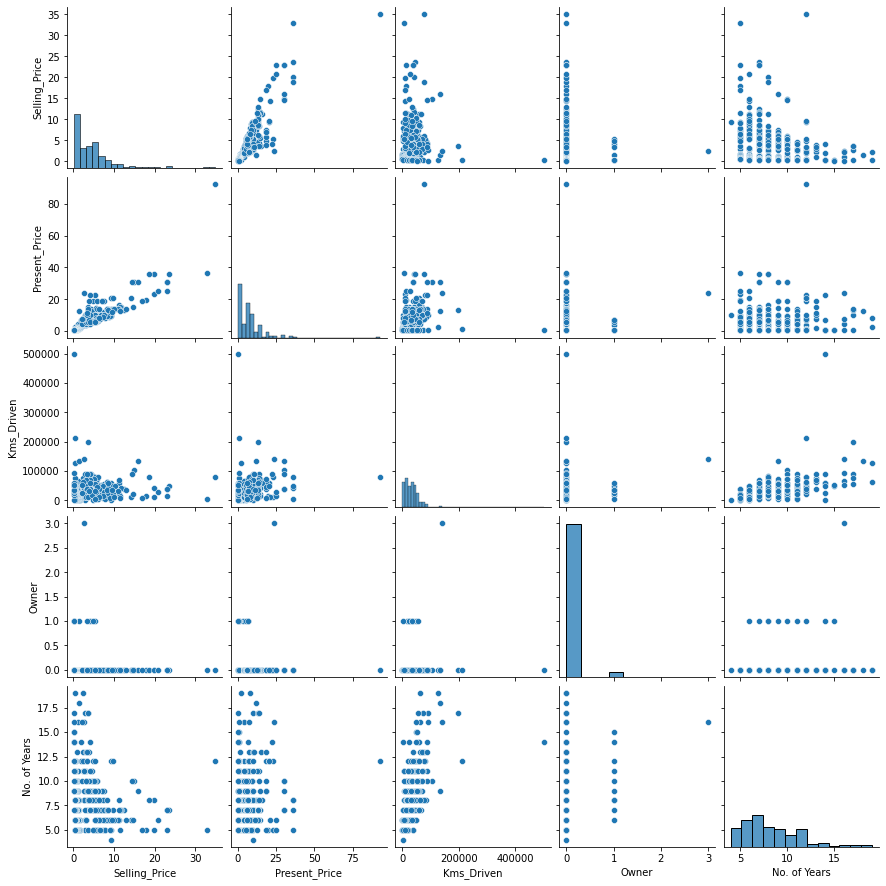

In [17]:
sns.pairplot(df)

<AxesSubplot:xlabel='count', ylabel='Car_Name'>

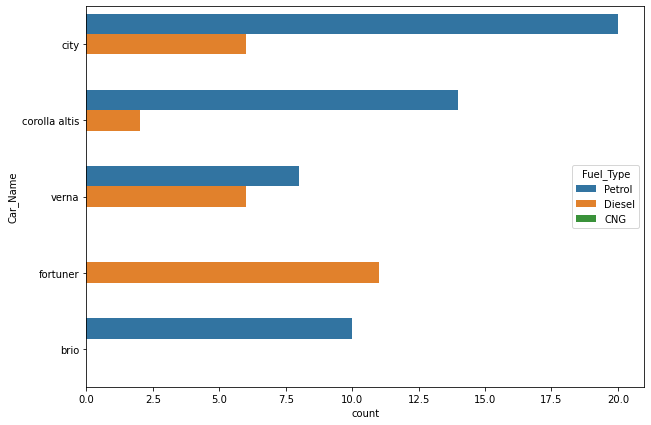

In [18]:
### Top 5 Model using Fuel_Type

plt.figure (figsize=(10,7))
sns.countplot(y='Car_Name', hue='Fuel_Type', data=df, order=df['Car_Name'].value_counts().iloc[:5].index)

<AxesSubplot:xlabel='count', ylabel='Car_Name'>

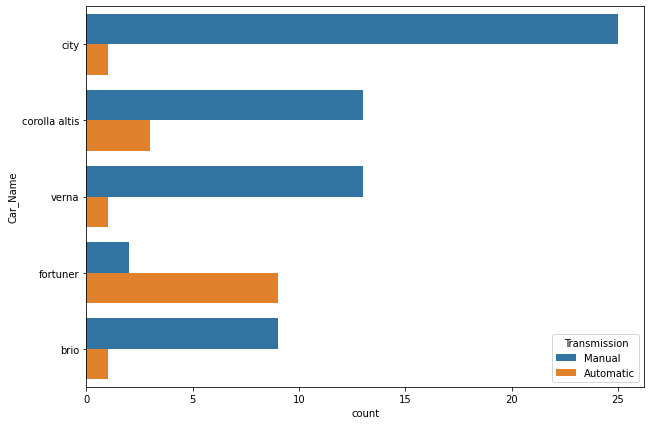

In [19]:
### Top 5 Model using Transmission

plt.figure (figsize=(10,7))
sns.countplot(y='Car_Name', hue='Transmission', data=df, order=df['Car_Name'].value_counts().iloc[:5].index)

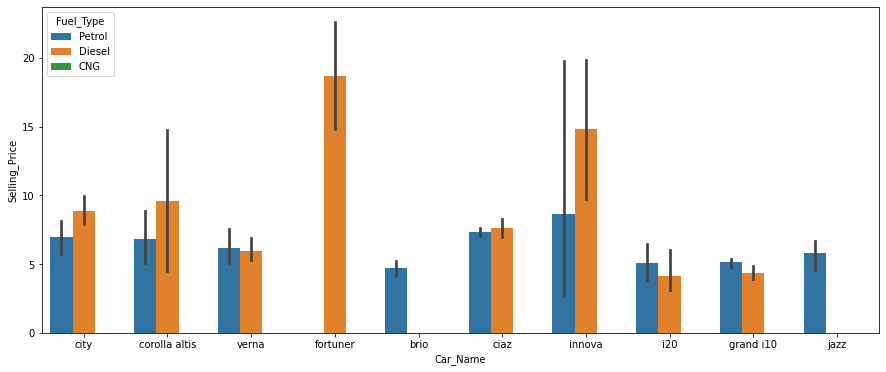

In [20]:
###LEt's see Top 10 car model's selling price using Fuel_type
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='Selling_Price', x='Car_Name', data=df, hue='Fuel_Type', order=df['Car_Name'].value_counts().iloc[:10].index)

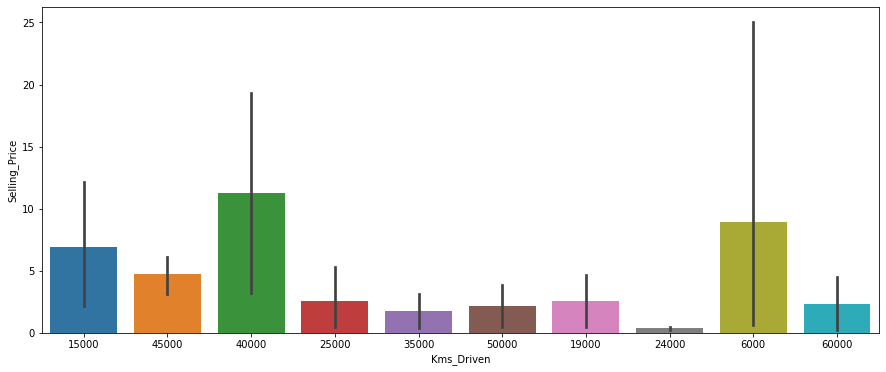

In [21]:
### Let's see whether Kms_Driven affects selling Price
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='Selling_Price', x='Kms_Driven', data=df, order=df['Kms_Driven'].sort_values(ascending=True).value_counts().iloc[:10].index )

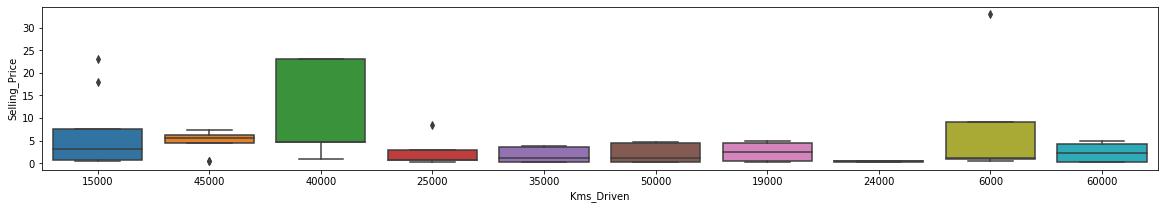

In [22]:
###Box plot to find outliers

fig, ax = plt.subplots(figsize=(20,3))
ax = sns.boxplot(x="Kms_Driven", y="Selling_Price", data=df, order=df['Kms_Driven'].sort_values(ascending=True).value_counts().iloc[:10].index)

In [23]:
print(df.corr())

               Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price       1.000000       0.878983    0.029187 -0.088344   
Present_Price       0.878983       1.000000    0.203647  0.008057   
Kms_Driven          0.029187       0.203647    1.000000  0.089216   
Owner              -0.088344       0.008057    0.089216  1.000000   
No. of Years       -0.236141       0.047584    0.524342  0.182104   

               No. of Years  
Selling_Price     -0.236141  
Present_Price      0.047584  
Kms_Driven         0.524342  
Owner              0.182104  
No. of Years       1.000000  


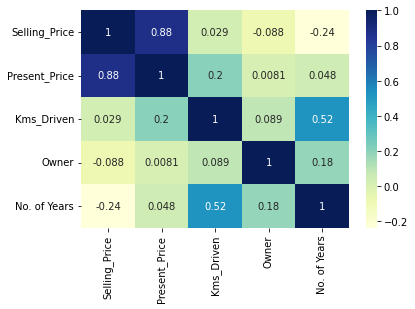

In [24]:
dataplot = sns.heatmap( df.corr(), cmap="YlGnBu", annot= True )
plt.show()

### Feature Engineering Part

<AxesSubplot:>

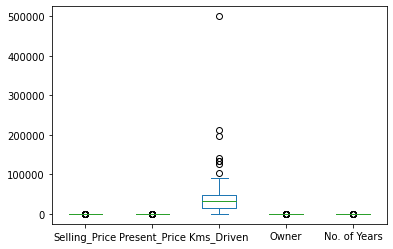

In [25]:
df.plot(kind='box')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Kms_Driven'>

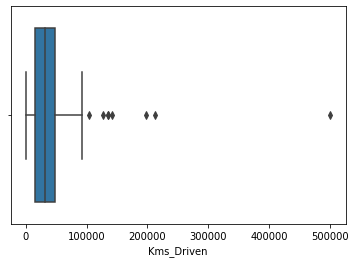

In [26]:
sns.boxplot(df['Kms_Driven'])

In [27]:
print(np.where(df['Kms_Driven']>400000))

(array([196]),)


In [28]:
from scipy import stats
z = np.abs(stats.zscore(df['Kms_Driven']))
print(z)

0      0.256224
1      0.155911
2      0.773969
3      0.817758
4      0.141743
         ...   
296    0.076225
297    0.593804
298    1.313340
299    0.719876
300    0.810958
Name: Kms_Driven, Length: 301, dtype: float64


In [29]:
Threshold = 3
z1=np.where(z>3)
z2=np.array(z1)
print(z2)
z3 = z2.flatten()
print(z3)

[[ 84 179 196]]
[ 84 179 196]


In [30]:
print('Old Shape:', df.shape)

Old Shape: (301, 9)


In [31]:
df.drop(z3, inplace=True, axis=0)
df

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,6
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,7
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,13
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,5


In [32]:
print('New Shape:',df.shape)

New Shape: (298, 9)


### Feature Selection

In [33]:
df.drop(['Car_Name'], inplace=True, axis=1)


In [34]:
df.head(10)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No. of Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8
5,9.25,9.83,2071,Diesel,Dealer,Manual,0,4
6,6.75,8.12,18796,Petrol,Dealer,Manual,0,7
7,6.50,8.61,33429,Diesel,Dealer,Manual,0,7
8,8.75,8.89,20273,Diesel,Dealer,Manual,0,6
9,7.45,8.92,42367,Diesel,Dealer,Manual,0,7


In [35]:
df = pd.get_dummies(df, drop_first=True)
df

,Selling_Price,Present_Price,Kms_Driven,Owner,No. of Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,0,1
297,4.00,5.90,60000,0,7,0,1,0,1
298,3.35,11.00,87934,0,13,0,1,0,1
299,11.50,12.50,9000,0,5,1,0,0,1


In [36]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [38]:
print(X_train.shape)
print(X_test.shape)

(238, 8)
(60, 8)


In [39]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=125)

In [40]:
reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=125)

In [41]:
y_pred = reg.predict(X_test)
y_pred

array([ 0.71832,  2.4832 ,  8.0452 ,  2.6868 ,  4.184  ,  5.15048,
        5.11872,  5.7156 , 16.48936,  0.31784,  4.0376 ,  7.1748 ,
        8.52432,  0.4304 ,  4.3304 ,  0.78512, 10.52392,  0.32216,
        1.24552,  7.8016 ,  1.12208,  0.21696,  0.44288,  4.5972 ,
        0.58552,  2.89   ,  0.62744,  3.3628 , 10.15464, 19.45392,
        0.42712,  5.4068 , 15.88104,  9.4756 ,  2.21016,  4.8616 ,
        5.1468 ,  4.6724 ,  0.43216,  5.114  ,  2.9312 ,  2.8244 ,
        0.252  ,  5.2724 ,  8.5892 ,  0.28656,  0.29688,  9.12408,
        1.08304, 10.41464,  9.3032 ,  7.0384 ,  1.07816,  0.95672,
        1.6384 ,  5.8788 ,  2.8268 ,  5.3764 ,  0.35464,  5.4524 ])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [43]:
print('Mean Squared Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test, y_pred))
print('R2 Score:',r2_score(y_test, y_pred))

Mean Squared Error: 0.5159121835733322
Mean Absolute Error: 0.43447066666666634
R2 Score: 0.9738641433127385
